In [20]:
import numpy as np
from scipy import interpolate
from scipy import optimize
import matplotlib.pyplot as plt

# Bisection Method

In [8]:
def bisection(f, x_start, x_end, iterations):
    for i in range(iterations):
        x_mid = (x_start + x_end) / 2

        if np.sign(f(x_mid)) == np.sign(f(x_start)):
            x_start = x_mid
        elif np.sign(f(x_mid)) == np.sign(f(x_end)):
            x_end = x_mid

    return (x_start + x_end) / 2

In [9]:
bisection(lambda x: np.cos(x) - x, 0., 1., 10)

0.73876953125

In [10]:
bisection(lambda x: np.cos(x) - x, 0., 1., 100)

0.7390851332151607

# Newton Rhapson Method

In [15]:
optimize.newton(lambda x: np.cos(x) - x, 1., lambda x: -np.sin(x) - 1, maxiter=4)

0.7390851332151607

# Euler's Method
Assuming $f'$ is a function of $x$ and $f$.

In [17]:
def euler(f_prime, f_0, x_start, x_end, steps):
    dx = (x_end - x_start) / steps

    res = [f_0]
    f = f_0

    for i in range(steps):
        f_prime_est = f_prime(dx * i + x_start, f)
        f += f_prime_est * dx

        res.append(f)

    return interpolate.interp1d(np.linspace(x_start, x_end, steps + 1), res)

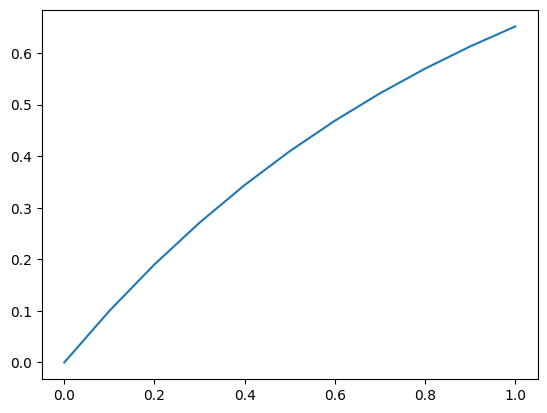

In [24]:
t = np.linspace(0, 1, 11)
v = euler(lambda x, y: (1 - y), 0, 0, 1, 10)(t)

plt.plot(t, v)
plt.show()